### **本节介绍图像的阈值操作**

阈值操作主要目的是为了**将图像二极化**

In [1]:
# 导入包
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 构建展示函数
def show(img,title = 'Test'):
    cv2.imshow(title,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

**一，简单阈值操作**：主要针对**灰度图**

主要函数为：**cv2.threshold()**，最后一个参数指定方法，**返回（ret，img）**，ret为阈值，img为得到的图像  
主要有以下方法:

（1） cv2.THRESH_BINARY，**二极化**    
（2） cv2.THRESH_BINARY_INV  **二极化反转**  
（3） cv2.THRESH_TRUNC  **高位截断**  
（4） cv2.THRESH_TOZERO  **高位置零**  
（5） cv2.THRESH_TOZERO_INV  **低位置零**  

In [16]:
# 以最常用的二极化操作为例

img = cv2.imread('images/lena.jpg',cv2.IMREAD_GRAYSCALE)

# 参数依次为原图，阈值，变化值，方法
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
print(ret) # 输出阈值

# 若只要图像仅取一个返回值即可
thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)[1]
thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)[1]
thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)[1]
thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)[1]

img_stack = np.concatenate([thresh1,thresh2,thresh3,thresh4,thresh5],axis = 1)
show(img_stack)


127.0


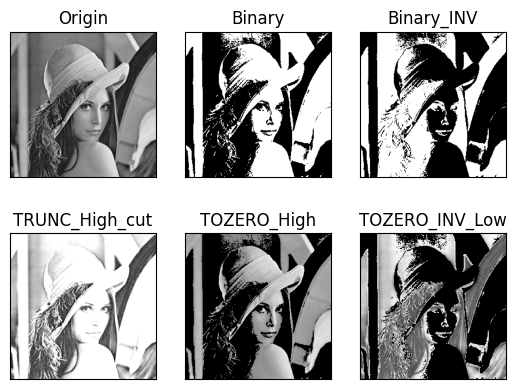

In [18]:
# 发现numpy融合图像展示不太好看，试着去用plt

img_stack = [img,thresh1,thresh2,thresh3,thresh4,thresh5]
titles = ['Origin','Binary','Binary_INV','TRUNC_High_cut','TOZERO_High','TOZERO_INV_Low']

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(img_stack[i],'gray') # plt展示一定要指定图片解读类型
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

**上面的阈值操作有很大的缺陷：阈值固定了**，导致处理效果不好  
下面介绍的自适应阈值操作可以较好地弥补上述缺陷

**二，自适应阈值操作**

在前面的部分我们使用是全局阈值，整幅图像采用同一个数作为阈值。当  
时这种方法并不适应与所有情况，尤其是当同一幅图像上的不同部分的具有不  
同亮度时。这种情况下我们需要采用自适应阈值。此时的阈值是根据图像上的  
每一个小区域计算与其对应的阈值。因此在同一幅图像上的不同区域采用的是  
不同的阈值，从而使我们能在亮度不同的情况下得到更好的结果。 

这种方法需要我们指定**三个参数**，返回值只有**一个**，**因为每个区域阈值不同，所以不用返回阈值**。  

• **Adaptive Method**- 指定**计算阈值的方法**。  
– cv2.ADPTIVE_THRESH_MEAN_C：阈值取自相邻区域的平均值  
– cv2.ADPTIVE_THRESH_GAUSSIAN_C：阈值取值相邻区域的加权和，权重为一个高斯窗口。 

• Block Size - 邻域大小（用来计算阈值的区域大小）。

• C - 这就是是一个常数，阈值就等于的平均值或者加权平均值减去这个常数。  

我们使用下面的代码来展示简单阈值与自适应阈值的差别：

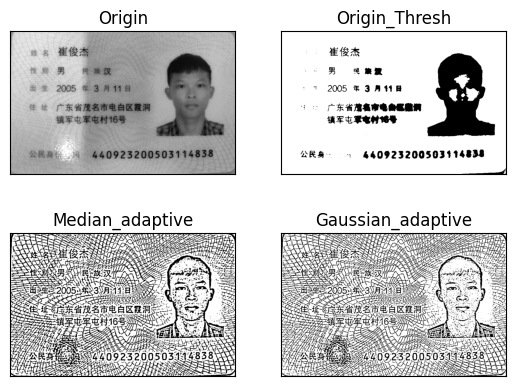

In [19]:
# 以我的身份证拍照版为例

img = cv2.imread('images/my_identity_card.jpg',cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img,(0,0),fx = 0.5,fy = 0.5)

# 普通阈值
thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)[1]

# 255为指定的最大值，然后是计算阈值方法，处理图像方法，11为领域大小，2为操作数
thresh2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2) # 中值自适应阈值
thresh3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2) # 高斯自适应阈值

img_stack = [img,thresh1,thresh2,thresh3]
titles = ['Origin','Origin_Thresh','Median_adaptive','Gaussian_adaptive']

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(img_stack[i],'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

由于我的图片选取不太好，看看别人的效果

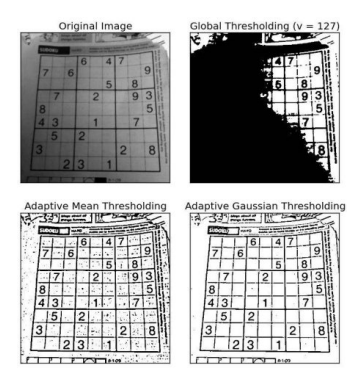

**三，Otsu’s 二值化**

顾名思义，即计算最优的阈值（区别于自适应阈值，每个区域阈值不同），**只有1个阈值**

之前我做身份证识别系统的时候用过了

130.0


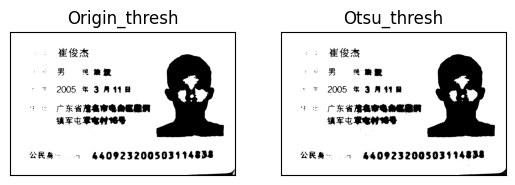

In [30]:
# 还是以身份证为例

img = cv2.imread('images/my_identity_card.jpg',cv2.IMREAD_GRAYSCALE)
thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY)[1] # 仅取一个返回值

# 阈值取0，其实取多少都行，因为后面加了otsu操作，所以自己定义的阈值无效
ret,thresh_otsu = cv2.threshold(img,0,255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)
print(ret) # 计算出的最优阈值为130

plt.subplot(1,2,1),plt.imshow(thresh,'gray'),plt.title('Origin_thresh'),plt.xticks([]),plt.yticks([])
plt.subplot(1,2,2),plt.imshow(thresh_otsu,'gray'),plt.title('Otsu_thresh'),plt.xticks([]),plt.yticks([])
plt.show()

# 由于130与127接近，故效果不明显